# Análisis de datos para caso Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# el PassengerId y el nombre del pasajero es poco relevante para el análisis así que los removemos
data.drop(columns=['PassengerId','Name'],inplace=True)

In [4]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


#  Convertimos datos categóricos a cuantitativos

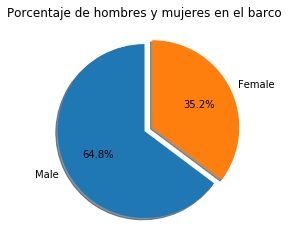

In [5]:
labels = 'Male','Female'
sizes = data.Sex.value_counts()
plt.pie(sizes, labels=labels, explode= (0, 0.1), shadow=True, startangle=90, autopct='%1.1f%%')
plt.title('Porcentaje de hombres y mujeres en el barco')
plt.show()

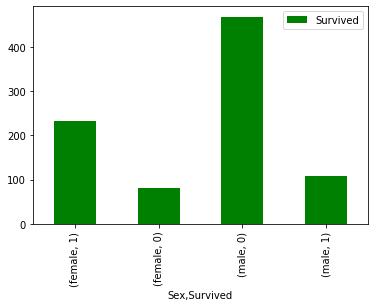

In [7]:
survived.plot(kind='bar', stacked=True, color=['green'])

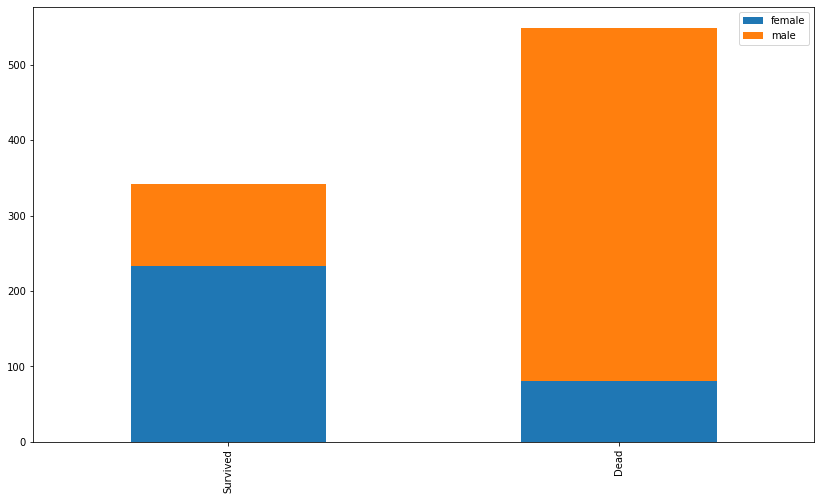

In [8]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()


df = pd.DataFrame([survived_sex, dead_sex])
df.index = ['Survived','Dead']
df.plot(stacked=True, kind='bar', figsize=(14,8))

,Class A,Class B,Class C
survived,136,87,119
dead,80,97,372


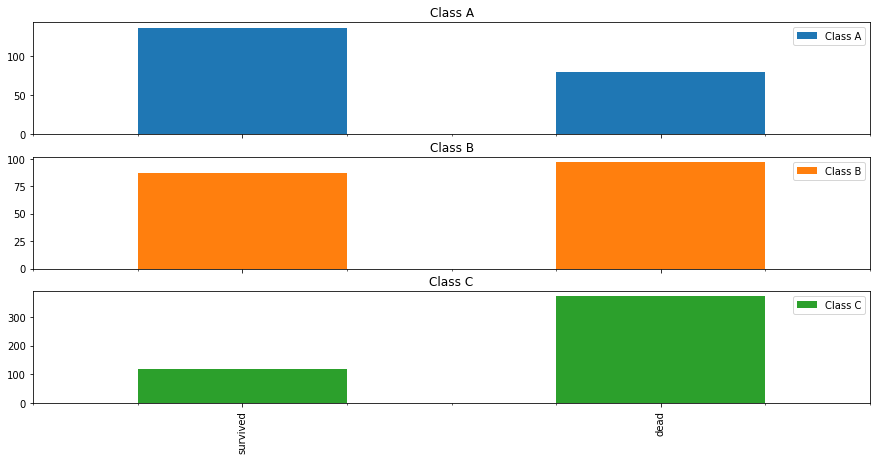

In [56]:
survived_class = data[data['Survived']==1]['Pclass'].value_counts()
dead_class = data[data['Survived']==0]['Pclass'].value_counts()

df = pd.DataFrame([survived_class, dead_class])
df.index = ['survived','dead']
df.columns = ['Class A','Class B','Class C']
axes = df.plot(kind='bar',subplots=True, figsize=(15,7))
axes[1].legend(loc=1) 
df

,Dead,Survived
Class A,80,136
Class B,97,87
Class C,372,119


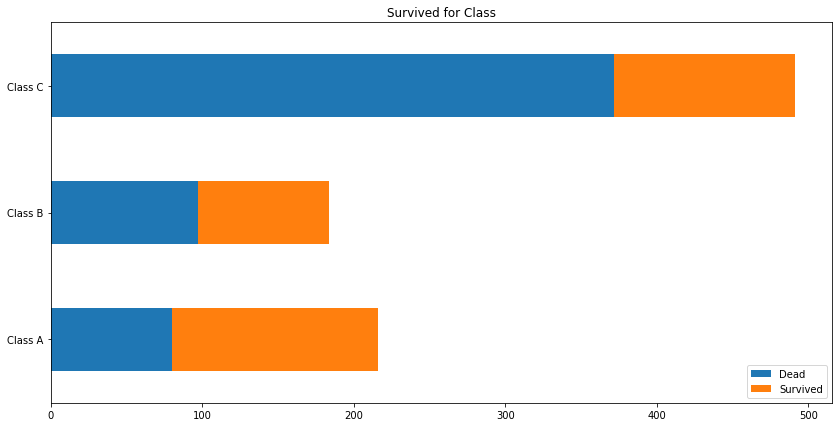

In [62]:
class_a = data[data['Pclass']==1]['Survived'].value_counts()
class_b = data[data['Pclass']==2]['Survived'].value_counts()
class_c = data[data['Pclass']==3]['Survived'].value_counts()

df = pd.DataFrame([class_a,class_b,class_c])
df.index = ['Class A','Class B','Class C']
df.columns = ['Dead','Survived']

df.plot(stacked=True, kind='barh', figsize=(14,7), title='Survived for Class')
df

In [11]:
# no podemos trabajar con variables categoricas como el sexo, 
# por lo tanto realizamos conversion. male:1 y female:0

data = data.replace({"male": 1, "female":0})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,1,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Cantidad de pasajeros por clase')

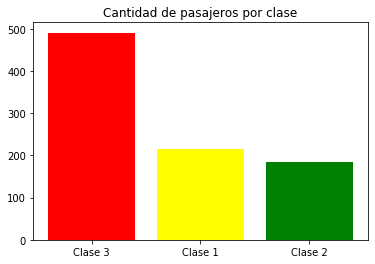

In [12]:
# Cantidad de pasajeros por clase

clases = ["Clase 3","Clase 1","Clase 2"]
sizes = data.Pclass.value_counts()

plt.bar(clases, sizes, color = ["Red",'Yellow',"Green"])
plt.title("Cantidad de pasajeros por clase")

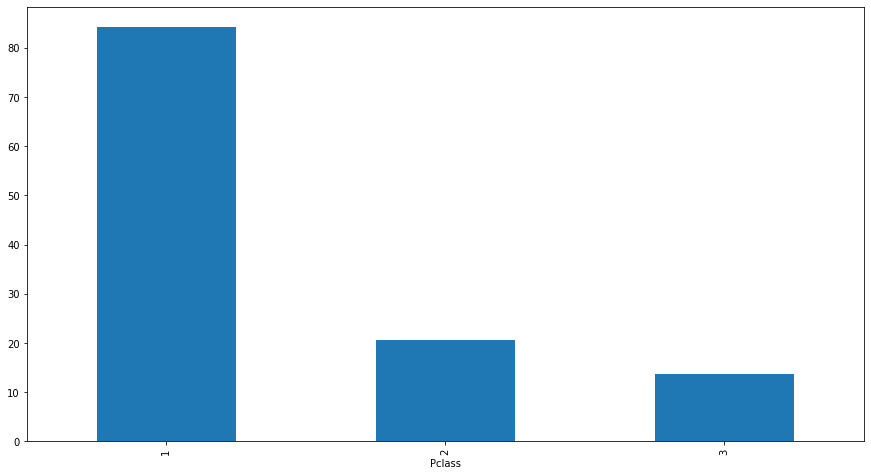

In [65]:
data.groupby('Pclass')['Fare'].mean().plot(kind='bar',figsize=(15,8))

# Hay que verificar si tenemos datos faltantes y definir el qué hacer con ellos

In [13]:
data.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

Obervamos que tenemos 177 casos donde la edad no está cargada. Hay que definir cómo tratarlos, hay varias alternativas:
    * eliminar tales registros
    * remplazar estos valores con algún otro (media, moda, mediana, etc.)
Se reemplazara  los valores por la media en este caso

In [14]:
round(data.Age.mean())

30

In [15]:
# reemplazo los valores null con la media redondeada
data['Age'].fillna(round(data.Age.mean()), inplace=True)

In [16]:
data.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

observamos que ahora ya no tenemos valores null en la columna Age =D

---------------------

# Expandir dimensión del vector

Columna SibSp representa la cantidad de hermanos en el titanic de la persona.

Columna Parch la cantidad de hijos/padres en el barco

Podriamos crear nueva dimensión "Family" a partir de la sumatoria de las columnas previamente mencionadas

In [17]:
#acumulamos todo en Parch
data['Parch'] = data['SibSp'] + data ['Parch']

# dropeamos columna SibSp
data.drop(columns='SibSp',inplace=True)

# renombramos el nombre de la columna
data.rename(columns={"Parch":"Family"}, inplace=True)

In [18]:
data.head()

,Survived,Pclass,Sex,Age,Family,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,A/5 21171,7.2500,NaN,S
1,1,1,0,38.0,1,PC 17599,71.2833,C85,C
2,1,3,0,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,0,35.0,1,113803,53.1000,C123,S
4,0,3,1,35.0,0,373450,8.0500,NaN,S


In [19]:
# la columna ticket no nos brinda información útil para la predicción 
# por lo tanto podemos eliminarla para nuestro análisis

data.drop(columns='Ticket',inplace=True)

In [20]:
data.head()

,Survived,Pclass,Sex,Age,Family,Fare,Cabin,Embarked
0,0,3,1,22.0,1,7.2500,NaN,S
1,1,1,0,38.0,1,71.2833,C85,C
2,1,3,0,26.0,0,7.9250,NaN,S
3,1,1,0,35.0,1,53.1000,C123,S
4,0,3,1,35.0,0,8.0500,NaN,S


# Datos faltante en column Cabin
* en este caso hay muchos datos faltantes pero no podemos reemplazar los datos faltantes a partir de los otros datos(no se puede aplicar media,mediana y la moda no tiene sentido aplicarlo en este caso), por lo tanto debemos de eliminar los registros con datos faltantes

In [21]:
data.Cabin.isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [22]:
data.drop(columns='Cabin',inplace=True)

In [23]:
data.head()

,Survived,Pclass,Sex,Age,Family,Fare,Embarked
0,0,3,1,22.0,1,7.2500,S
1,1,1,0,38.0,1,71.2833,C
2,1,3,0,26.0,0,7.9250,S
3,1,1,0,35.0,1,53.1000,S
4,0,3,1,35.0,0,8.0500,S


In [24]:
# Embarked nos da en que puerto arrivaron al bote
# intentamos observar si tiene relación con si las personas sobrevivieron por ello o no

data.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

 * Aparentemente no hay relación alguna por lo tanto podemos eliminar tal columna

In [25]:
data.drop(columns='Embarked',inplace=True)

In [26]:
data.head()

,Survived,Pclass,Sex,Age,Family,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500


# Análisis de correlación

In [27]:
corr = round(data.corr(),3)
corr.style.background_gradient()

,Survived,Pclass,Sex,Age,Family,Fare
Survived,1,-0.338,-0.543,-0.071,0.017,0.257
Pclass,-0.338,1,0.132,-0.33,0.066,-0.549
Sex,-0.543,0.132,1,0.085,-0.201,-0.182
Age,-0.071,-0.33,0.085,1,-0.249,0.091
Family,0.017,0.066,-0.201,-0.249,1,0.217
Fare,0.257,-0.549,-0.182,0.091,0.217,1


## Observamos de esto que:
   ### * Sobrevivir está muy correlacionado con el sexo de la persona, la clase por la que se pago, y a menor medida con el precio del ticket
   ### * La clase con el precio del ticket está muy correlacionada

# Modelo MultiLayerPerceptron

In [28]:
from sklearn.neural_network import MLPClassifier

X = data.drop(columns="Survived")
Y = data.Survived

mlp = MLPClassifier(alpha=1e-4, hidden_layer_sizes=(5,2), random_state=1
                   ,max_iter = 2000)

mlp.fit(X,Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
data_test = pd.read_csv("test.csv")

data_test.drop(columns=['Cabin','Name', 'Embarked','Ticket','PassengerId'], inplace= True)

In [30]:
data_test['SibSp'] = data_test['SibSp']+data_test['Parch']

In [31]:
data_test.rename(columns={"SibSp":"Family"}, inplace=True)

In [32]:
data_test.drop(columns="Parch",inplace=True)

In [33]:
data_test.Age.fillna(round(data_test.Age.mean()), inplace=True)

In [34]:
data_test.replace({"male":1, "female":0}, inplace=True)

In [35]:
data_test.Fare.fillna(data_test.Fare.mean(), inplace=True)

In [36]:
from sklearn.metrics import mean_squared_error

## hacemos la predicicon con nuestros datos de de entrenamiento

predict = mlp.predict(X)

mean_squared_error(Y, predict)

0.20202020202020202

In [37]:
# ahora sobre el data_test

result_real = pd.read_csv("gender_submission.csv")

predict_test = mlp.predict(data_test)

mean_squared_error(result_real['Survived'], predict_test)

results = pd.DataFrame(result_real['Survived'], columns=["Real"])

In [38]:
#result_real['Survived'].values
results['Real'] = result_real['Survived']

In [39]:
results['Predict'] = predict_test

In [40]:
result_real['Predict'] = predict_test

In [41]:
result_real

,PassengerId,Survived,Predict
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1
5,897,0,0
6,898,1,1
7,899,0,0
8,900,1,1
9,901,0,0
